In [46]:
%load_ext nb_black
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
print(os.getcwd())

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black
d:\github\learning-py-java-etc\course\d048


<IPython.core.display.Javascript object>

In [47]:
chipo = pd.read_csv("../../../data/chipotle.tsv", sep="\t")
display(chipo.head())
chipo.info()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


<IPython.core.display.Javascript object>

In [66]:
chipo_pre.sum??

<IPython.core.display.Javascript object>

Signature:
chipo_pre.sum(
    axis=None,
    skipna=None,
    level=None,
    numeric_only=None,
    min_count=0,
    **kwargs,
)
Docstring:
Return the sum of the values over the requested axis.

This is equivalent to the method ``numpy.sum``.

Parameters
----------
axis : {index (0), columns (1)}
    Axis for the function to be applied on.
skipna : bool, default True
    Exclude NA/null values when computing the result.
level : int or level name, default None
    If the axis is a MultiIndex (hierarchical), count along a
    particular level, collapsing into a Series.
numeric_only : bool, default None
    Include only float, int, boolean columns. If None, will attempt to use
    everything, then use only numeric data. Not implemented for Series.
min_count : int, default 0
    The required number of valid values to perform the operation. If fewer than
    ``min_count`` non-NA values are present the result will be NA.
**kwargs
    Additional keyword arguments to be passed to the function

In [48]:
chipo_pre = chipo.copy()
chipo_pre['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo_pre = chipo_pre.rename(columns={'item_price':'item_price[$]'})
display(chipo_pre.head())

,order_id,quantity,item_name,choice_description,item_price[$]
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


<IPython.core.display.Javascript object>

In [49]:
example1 = chipo_pre.groupby('item_name')['quantity'].sum().to_frame()
example1["item_price(per order)[$]"] =chipo_pre.groupby('item_name')['item_price[$]'].mean()
display(example1.head())

,quantity,item_price(per order)[$]
item_name,,
6 Pack Soft Drink,55,6.610185
Barbacoa Bowl,66,10.187273
Barbacoa Burrito,91,9.832418
Barbacoa Crispy Tacos,12,10.928182
Barbacoa Salad Bowl,10,10.640000


<IPython.core.display.Javascript object>

In [50]:
example2 = chipo_pre.groupby("order_id").sum()["item_price[$]"]
display(example2.to_frame().head())
display(example2.to_frame().describe())
print("max price order id:", example2[example2 == example2.max()].index.values[0])

,item_price[$]
order_id,
1,11.56
2,16.98
3,12.67
4,21.00
5,13.70


,item_price[$]
count,1834.000000
mean,18.811429
std,11.652512
min,10.080000
25%,12.572500
50%,16.200000
75%,21.960000
max,205.250000


max price order id: 926


<IPython.core.display.Javascript object>

In [51]:
temp = chipo_pre[['item_name', "choice_description"]].copy()
temp["item_price_per_quantity"] = chipo_pre["item_price[$]"] / chipo_pre["quantity"]
example3 = temp.groupby("item_name").min().sort_values("item_price_per_quantity")
display(example3.head())

,choice_description,item_price_per_quantity
item_name,,
Bottled Water,NaN,1.09
Canned Soda,[Coca Cola],1.09
Canned Soft Drink,[Coke],1.25
Side of Chips,NaN,1.69
Chips,NaN,1.99


<IPython.core.display.Javascript object>

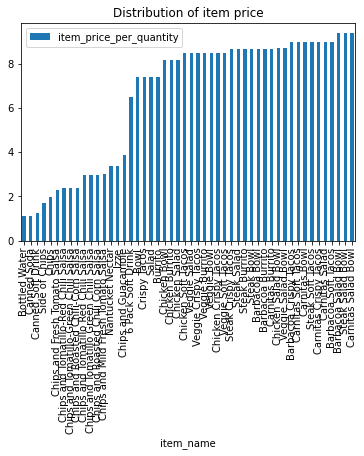

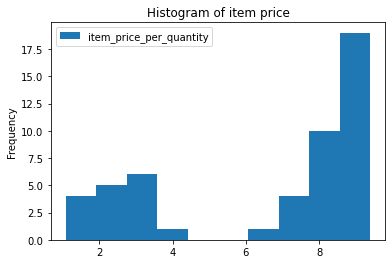

<IPython.core.display.Javascript object>

In [52]:
example3.reset_index(inplace=False).plot.bar(x="item_name",y="item_price_per_quantity")
plt.title("Distribution of item price")
plt.show()
example3.reset_index(inplace=False).plot.hist()
plt.title("Histogram of item price")
plt.show()

In [53]:
example4 = chipo_pre.groupby('order_id').sum().sort_values("item_price[$]", ascending=False).head()
display(example4)

,quantity,item_price[$]
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30


<IPython.core.display.Javascript object>

In [54]:
example5 = chipo_pre[chipo_pre["item_name"] == "Veggie Salad Bowl"].drop_duplicates("order_id")
display(example5.head())
print("number of order :",len(example5))

,order_id,quantity,item_name,choice_description,item_price[$]
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


number of order : 18


<IPython.core.display.Javascript object>

In [62]:
example6 = chipo_pre[(chipo_pre["item_name"] == "Chicken Bowl") & (chipo["quantity"] >= 2)]
display(example6.head())
print("number of selected order: ", len(example6))

,order_id,quantity,item_name,choice_description,item_price[$]
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
154,70,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50
282,124,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",17.50
409,178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",32.94
415,181,2,Chicken Bowl,[Tomatillo Red Chili Salsa],17.50


number of selected order:  33


<IPython.core.display.Javascript object>